In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:

raw_dataset = pd.read_csv('chicago summary lag 6.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter
0,3/1/2005,157.966468,5.93,40731,9362.080,6.2,471401.491,1195.605,43.50%,177440,1.70%,4629,1.68,175.2
1,4/1/2005,159.153794,5.86,43490,9398.855,6.1,494879.583,1195.605,43.50%,178915,1.60%,4585,2.00,177.3
2,5/1/2005,161.324973,5.72,43490,9398.855,6.0,494879.583,1195.605,43.50%,178915,1.60%,4618,1.43,176.9
3,6/1/2005,162.646391,5.58,43490,9398.855,6.4,494879.583,1195.605,43.50%,178915,1.60%,4476,1.44,177.0
4,7/1/2005,164.447885,5.70,43490,9398.855,6.0,494879.583,1195.605,43.40%,179553,1.60%,4920,2.00,177.3
5,8/1/2005,165.921457,5.82,43490,9398.855,5.5,494879.583,1195.605,43.40%,179553,1.60%,5641,1.80,179.0
6,9/1/2005,168.016174,5.77,43490,9398.855,5.5,494879.583,1195.605,43.40%,179553,1.60%,4897,1.71,183.0
7,10/1/2005,167.616675,6.07,43490,9398.855,5.1,494879.583,1195.605,43.10%,181901,1.60%,4657,1.75,182.9
8,11/1/2005,167.717165,6.33,43490,9398.855,5.2,494879.583,1195.605,43.10%,181901,1.60%,4448,1.85,181.7
9,12/1/2005,167.155395,6.27,43490,9398.855,5.1,494879.583,1195.605,43.10%,181901,1.60%,3988,2.01,180.1


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,157.966468,5.93,40731,9362.080,6.2,471401.491,1195.605,177440,4629,1.68,175.2,43.5,1.7
1,4/1/2005,159.153794,5.86,43490,9398.855,6.1,494879.583,1195.605,178915,4585,2.00,177.3,43.5,1.6
2,5/1/2005,161.324973,5.72,43490,9398.855,6.0,494879.583,1195.605,178915,4618,1.43,176.9,43.5,1.6
3,6/1/2005,162.646391,5.58,43490,9398.855,6.4,494879.583,1195.605,178915,4476,1.44,177.0,43.5,1.6
4,7/1/2005,164.447885,5.70,43490,9398.855,6.0,494879.583,1195.605,179553,4920,2.00,177.3,43.4,1.6


In [4]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [5]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,40731,9362.080,6.2,471401.491,1195.605,177440,4629,1.68,175.200,43.5,1.7
1,5.86,43490,9398.855,6.1,494879.583,1195.605,178915,4585,2.00,177.300,43.5,1.6
2,5.72,43490,9398.855,6.0,494879.583,1195.605,178915,4618,1.43,176.900,43.5,1.6
3,5.58,43490,9398.855,6.4,494879.583,1195.605,178915,4476,1.44,177.000,43.5,1.6
4,5.70,43490,9398.855,6.0,494879.583,1195.605,179553,4920,2.00,177.300,43.4,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...
143,4.17,61642,9484.158,5.4,691288.417,1098.860,164638,1623,1.92,209.346,36.4,2.0
144,4.20,61642,9484.158,4.7,691288.417,1098.860,164638,1165,1.70,209.426,36.4,2.0
145,4.05,61642,9484.158,4.5,691288.417,1098.860,164674,2671,1.37,210.220,36.3,1.8
146,4.01,61642,9484.158,4.4,691288.417,1098.860,164674,1201,1.43,209.999,36.3,1.8


In [6]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),148.0,4.804324,1.043601,3.350,3.93500,4.475,5.92000,6.760
Personal_Income,148.0,49673.439189,5472.222560,40731.000,45919.00000,48761.000,55508.00000,61642.000
Resident_Population,148.0,9512.673324,48.820695,9362.080,9484.15800,9515.636,9550.19400,9580.567
Unemployment_Rate,148.0,7.340541,2.217980,3.700,5.47500,6.500,9.52500,12.200
GDP,148.0,566157.059392,60995.318661,471401.491,513514.06700,561292.438,632200.03300,691288.417
Crime_Rate,148.0,1052.521095,119.650336,884.000,969.14000,1098.860,1178.71400,1208.601
Median_Debt,148.0,179138.587838,10112.653928,164465.000,168444.00000,179553.000,189295.00000,193843.000
New_Structures,148.0,1687.777027,1319.655675,235.000,700.75000,1164.000,2188.00000,5641.000
Economic_Conditions_Index,148.0,1.056622,1.862427,-6.130,1.10250,1.705,2.02000,2.780
CPI less shelter,148.0,198.710764,10.583413,175.200,190.26725,203.020,207.53075,213.749


In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.078645,-1.634151,-3.084621,-0.514225,-1.553489,1.195850,-0.167967,2.228781,0.334713,-2.221473,0.734464,-1.127347
1,1.011570,-1.129969,-2.331354,-0.559311,-1.168573,1.195850,-0.022110,2.195439,0.506532,-2.023049,0.734464,-1.174679
2,0.877419,-1.129969,-2.331354,-0.604397,-1.168573,1.195850,-0.022110,2.220445,0.200479,-2.060844,0.734464,-1.174679
3,0.743268,-1.129969,-2.331354,-0.424053,-1.168573,1.195850,-0.022110,2.112841,0.205849,-2.051395,0.734464,-1.174679
4,0.858255,-1.129969,-2.331354,-0.604397,-1.168573,1.195850,0.040980,2.449293,0.506532,-2.023049,0.700852,-1.174679
...,...,...,...,...,...,...,...,...,...,...,...,...
143,-0.607822,2.187148,-0.584083,-0.874914,2.051491,0.387286,-1.433905,-0.049086,0.463577,1.004897,-1.651976,-0.985349
144,-0.579076,2.187148,-0.584083,-1.190516,2.051491,0.387286,-1.433905,-0.396147,0.345452,1.012456,-1.651976,-0.985349
145,-0.722809,2.187148,-0.584083,-1.280688,2.051491,0.387286,-1.430345,0.745060,0.168263,1.087479,-1.685588,-1.080014
146,-0.761138,2.187148,-0.584083,-1.325774,2.051491,0.387286,-1.430345,-0.368867,0.200479,1.066597,-1.685588,-1.080014


In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

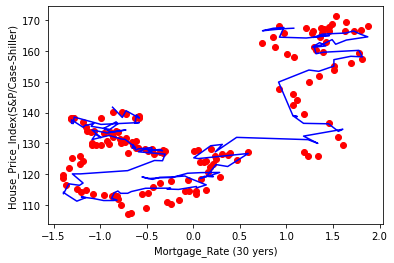

In [10]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 2.74
Accuracy: 97.91 %.


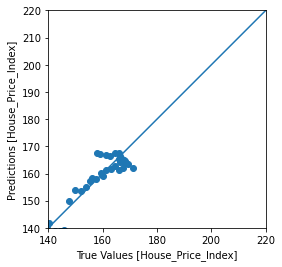

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [12]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.9628611329627381

In [14]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,1.910778
1,16.811197
2,-1.310012
3,0.618216
4,-17.800587
5,-1.923243
6,-1.288855
7,2.018589
8,0.948976
9,-5.018617


In [15]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [16]:
print(y_pred)

[167.41942045 167.32496504 166.99047989 166.58610702 167.39942914
 167.67460199 164.50236374 164.23411622 165.03833136 165.03721071
 164.421326   165.48836094 165.60306982 165.84591182 166.52490987
 165.44956331 164.6207859  163.57082073 162.20572903 163.71754955
 161.99584881 161.32319256 162.72400816 161.65491388 161.26677261
 159.12025023 159.61063836 160.22010848 158.10575456 158.29272671
 157.19318354 155.11767274 153.40822361 153.82554813 149.90897913
 139.05051143 138.70209496 138.99995519 136.50084768 136.35363868
 133.89592978 134.5819996  132.34781848 129.98586579 131.20275308
 131.94037747 127.20270065 129.65498691 129.2170931  125.29002222
 125.04460625 126.70798957 123.04797046 122.47146649 123.09800936
 119.1058036  118.57342284 119.29599119 119.20787739 119.2148505
 119.29229106 120.54515974 120.4828219  120.27785157 118.84208457
 118.97433936 118.29603916 119.09169808 118.53531676 119.37987154
 118.70196621 116.50057925 115.51720256 115.98544861 115.02700227
 115.151049

In [17]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,167.419420
1,167.324965
2,166.990480
3,166.586107
4,167.399429
...,...
143,139.206705
144,138.215917
145,140.628576
146,138.414274


In [18]:
X_transpose=X.transpose()

In [19]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
Mortgage_Rate (30 yers),1.078645,1.011570,0.877419,0.743268,0.858255,0.973241,0.925330,1.212796,1.461934,1.404440,...,-1.288159,-1.278577,-0.991111,-0.579076,-0.626987,-0.607822,-0.579076,-0.722809,-0.761138,-0.866542
Personal_Income,-1.634151,-1.129969,-1.129969,-1.129969,-1.129969,-1.129969,-1.129969,-1.129969,-1.129969,-1.129969,...,1.582092,1.582092,1.582092,1.582092,1.582092,2.187148,2.187148,2.187148,2.187148,2.187148
Resident_Population,-3.084621,-2.331354,-2.331354,-2.331354,-2.331354,-2.331354,-2.331354,-2.331354,-2.331354,-2.331354,...,0.029489,0.029489,0.029489,0.029489,0.029489,-0.584083,-0.584083,-0.584083,-0.584083,-0.584083
Unemployment_Rate,-0.514225,-0.559311,-0.604397,-0.424053,-0.604397,-0.829828,-0.829828,-1.010172,-0.965086,-1.010172,...,-0.829828,-0.829828,-1.055258,-1.010172,-0.694569,-0.874914,-1.190516,-1.280688,-1.325774,-1.010172
GDP,-1.553489,-1.168573,-1.168573,-1.168573,-1.168573,-1.168573,-1.168573,-1.168573,-1.168573,-1.168573,...,1.516116,1.516116,1.516116,1.516116,1.516116,2.051491,2.051491,2.051491,2.051491,2.051491
Crime_Rate,1.195850,1.195850,1.195850,1.195850,1.195850,1.195850,1.195850,1.195850,1.195850,1.195850,...,0.442614,0.442614,0.442614,0.442614,0.387286,0.387286,0.387286,0.387286,0.387286,0.387286
Median_Debt,-0.167967,-0.022110,-0.022110,-0.022110,0.040980,0.040980,0.040980,0.273164,0.273164,0.273164,...,-1.450914,-1.451013,-1.451013,-1.451013,-1.433905,-1.433905,-1.433905,-1.430345,-1.430345,-1.430345
New_Structures,2.228781,2.195439,2.220445,2.112841,2.449293,2.995647,2.431864,2.249998,2.091624,1.743048,...,0.101711,0.960268,-0.397662,-0.466619,-0.748511,-0.049086,-0.396147,0.745060,-0.368867,1.151227
Economic_Conditions_Index,0.334713,0.506532,0.200479,0.205849,0.506532,0.399145,0.350821,0.372298,0.425992,0.511901,...,0.313235,0.377668,0.313235,0.152155,0.420622,0.463577,0.345452,0.168263,0.200479,0.200479
CPI less shelter,-2.221473,-2.023049,-2.060844,-2.051395,-2.023049,-1.862420,-1.484470,-1.493919,-1.607304,-1.758484,...,0.818662,0.848992,0.847764,0.833213,0.968047,1.004897,1.012456,1.087479,1.066597,1.013212


In [20]:
X_transpose=X_transpose.reset_index()

In [21]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,138,139,140,141,142,143,144,145,146,147
0,Mortgage_Rate (30 yers),1.078645,1.011570,0.877419,0.743268,0.858255,0.973241,0.925330,1.212796,1.461934,...,-1.288159,-1.278577,-0.991111,-0.579076,-0.626987,-0.607822,-0.579076,-0.722809,-0.761138,-0.866542
1,Personal_Income,-1.634151,-1.129969,-1.129969,-1.129969,-1.129969,-1.129969,-1.129969,-1.129969,-1.129969,...,1.582092,1.582092,1.582092,1.582092,1.582092,2.187148,2.187148,2.187148,2.187148,2.187148
2,Resident_Population,-3.084621,-2.331354,-2.331354,-2.331354,-2.331354,-2.331354,-2.331354,-2.331354,-2.331354,...,0.029489,0.029489,0.029489,0.029489,0.029489,-0.584083,-0.584083,-0.584083,-0.584083,-0.584083
3,Unemployment_Rate,-0.514225,-0.559311,-0.604397,-0.424053,-0.604397,-0.829828,-0.829828,-1.010172,-0.965086,...,-0.829828,-0.829828,-1.055258,-1.010172,-0.694569,-0.874914,-1.190516,-1.280688,-1.325774,-1.010172
4,GDP,-1.553489,-1.168573,-1.168573,-1.168573,-1.168573,-1.168573,-1.168573,-1.168573,-1.168573,...,1.516116,1.516116,1.516116,1.516116,1.516116,2.051491,2.051491,2.051491,2.051491,2.051491
5,Crime_Rate,1.195850,1.195850,1.195850,1.195850,1.195850,1.195850,1.195850,1.195850,1.195850,...,0.442614,0.442614,0.442614,0.442614,0.387286,0.387286,0.387286,0.387286,0.387286,0.387286
6,Median_Debt,-0.167967,-0.022110,-0.022110,-0.022110,0.040980,0.040980,0.040980,0.273164,0.273164,...,-1.450914,-1.451013,-1.451013,-1.451013,-1.433905,-1.433905,-1.433905,-1.430345,-1.430345,-1.430345
7,New_Structures,2.228781,2.195439,2.220445,2.112841,2.449293,2.995647,2.431864,2.249998,2.091624,...,0.101711,0.960268,-0.397662,-0.466619,-0.748511,-0.049086,-0.396147,0.745060,-0.368867,1.151227
8,Economic_Conditions_Index,0.334713,0.506532,0.200479,0.205849,0.506532,0.399145,0.350821,0.372298,0.425992,...,0.313235,0.377668,0.313235,0.152155,0.420622,0.463577,0.345452,0.168263,0.200479,0.200479
9,CPI less shelter,-2.221473,-2.023049,-2.060844,-2.051395,-2.023049,-1.862420,-1.484470,-1.493919,-1.607304,...,0.818662,0.848992,0.847764,0.833213,0.968047,1.004897,1.012456,1.087479,1.066597,1.013212


In [22]:
X_transpose_index=X_transpose[['index']]

In [23]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI less shelter


In [24]:
X_transpose_index=X_transpose_index.join(coef)

In [25]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),1.910778
1,Personal_Income,16.811197
2,Resident_Population,-1.310012
3,Unemployment_Rate,0.618216
4,GDP,-17.800587
5,Crime_Rate,-1.923243
6,Median_Debt,-1.288855
7,New_Structures,2.018589
8,Economic_Conditions_Index,0.948976
9,CPI less shelter,-5.018617


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

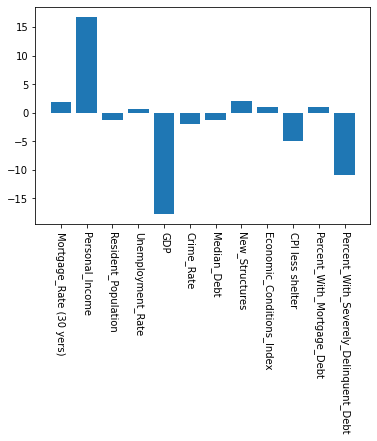

In [26]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [27]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter
0,7/1/2017,138.347211,3.97,61642,9484.158,5.1,691288.417,1098.86,35.80%,164838,1.80%,1140,1.44,210.359
1,8/1/2017,138.546276,3.88,61642,9484.158,5.3,691288.417,1098.86,35.80%,164838,1.80%,1785,1.56,211.010
2,9/1/2017,139.001794,3.81,61642,9484.158,4.6,691288.417,1098.86,35.80%,164838,1.80%,1810,1.79,211.699
3,10/1/2017,139.375383,3.90,61642,9484.158,4.5,691288.417,1098.86,35.50%,164821,1.80%,1895,1.75,210.498
4,11/1/2017,140.042769,3.92,61642,9484.158,4.4,691288.417,1098.86,35.50%,164821,1.80%,1499,1.89,211.096
5,12/1/2017,140.240722,3.95,61642,9484.158,4.4,691288.417,1098.86,35.50%,164821,1.80%,1699,1.94,210.373
6,1/1/2018,141.063547,4.03,61642,9484.158,5.0,691288.417,1006.09,36.00%,164448,1.70%,671,1.96,211.957
7,2/1/2018,141.469333,4.33,63500,9458.539,4.8,709160.008,1006.09,36.00%,164448,1.70%,864,1.99,211.617
8,3/1/2018,141.786227,4.44,63500,9458.539,4.1,709160.008,1006.09,36.00%,164448,1.70%,1370,1.85,211.577
9,4/1/2018,141.763468,4.47,63500,9458.539,3.7,709160.008,1006.09,35.80%,164034,1.50%,1767,1.21,213.099


In [28]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,7/1/2017,138.347211,3.97,61642,9484.158,5.1,691288.417,1098.86,164838,1140,1.44,210.359,35.8,1.8
1,8/1/2017,138.546276,3.88,61642,9484.158,5.3,691288.417,1098.86,164838,1785,1.56,211.010,35.8,1.8
2,9/1/2017,139.001794,3.81,61642,9484.158,4.6,691288.417,1098.86,164838,1810,1.79,211.699,35.8,1.8
3,10/1/2017,139.375383,3.90,61642,9484.158,4.5,691288.417,1098.86,164821,1895,1.75,210.498,35.5,1.8
4,11/1/2017,140.042769,3.92,61642,9484.158,4.4,691288.417,1098.86,164821,1499,1.89,211.096,35.5,1.8


In [29]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3.97,61642,9484.158,5.1,691288.417,1098.86,164838,1140,1.44,210.359,35.8,1.8
1,3.88,61642,9484.158,5.3,691288.417,1098.86,164838,1785,1.56,211.010,35.8,1.8
2,3.81,61642,9484.158,4.6,691288.417,1098.86,164838,1810,1.79,211.699,35.8,1.8
3,3.90,61642,9484.158,4.5,691288.417,1098.86,164821,1895,1.75,210.498,35.5,1.8
4,3.92,61642,9484.158,4.4,691288.417,1098.86,164821,1499,1.89,211.096,35.5,1.8
5,3.95,61642,9484.158,4.4,691288.417,1098.86,164821,1699,1.94,210.373,35.5,1.8
6,4.03,61642,9484.158,5.0,691288.417,1006.09,164448,671,1.96,211.957,36.0,1.7
7,4.33,63500,9458.539,4.8,709160.008,1006.09,164448,864,1.99,211.617,36.0,1.7
8,4.44,63500,9458.539,4.1,709160.008,1006.09,164448,1370,1.85,211.577,36.0,1.7
9,4.47,63500,9458.539,3.7,709160.008,1006.09,164034,1767,1.21,213.099,35.8,1.5


In [30]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,4.155000,0.298374,3.810,3.9150,4.000,4.44750,4.590
Personal_Income,12.0,62416.166667,956.737433,61642.000,61642.0000,61642.000,63500.00000,63500.000
Resident_Population,12.0,9473.483417,13.191957,9458.539,9458.5390,9484.158,9484.15800,9484.158
Unemployment_Rate,12.0,4.491667,0.536755,3.500,4.3250,4.500,4.85000,5.300
GDP,12.0,698734.913250,9202.594237,691288.417,691288.4170,691288.417,709160.00800,709160.008
Crime_Rate,12.0,1052.475000,48.447552,1006.090,1006.0900,1052.475,1098.86000,1098.860
Median_Debt,12.0,164535.250000,343.315949,164034.000,164344.5000,164634.500,164825.25000,164838.000
New_Structures,12.0,1529.083333,441.546138,671.000,1312.5000,1693.500,1791.25000,2161.000
Economic_Conditions_Index,12.0,1.706667,0.244478,1.210,1.5425,1.770,1.90250,1.990
CPI less shelter,12.0,211.666750,1.116184,210.359,210.8820,211.597,212.20575,213.764


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.799467,2.187148,-0.584083,-1.010172,2.051491,0.387286,-1.414128,-0.415091,0.205849,1.100612,-1.853647,-1.080014
1,-0.885706,2.187148,-0.584083,-0.920000,2.051491,0.387286,-1.414128,0.073673,0.270281,1.162124,-1.853647,-1.080014
2,-0.952782,2.187148,-0.584083,-1.235602,2.051491,0.387286,-1.414128,0.092617,0.393776,1.227226,-1.853647,-1.080014
3,-0.866542,2.187148,-0.584083,-1.280688,2.051491,0.387286,-1.415809,0.157028,0.372298,1.113746,-1.954482,-1.080014
4,-0.847378,2.187148,-0.584083,-1.325774,2.051491,0.387286,-1.415809,-0.143050,0.447469,1.170250,-1.954482,-1.080014
5,-0.818631,2.187148,-0.584083,-1.325774,2.051491,0.387286,-1.415809,0.008504,0.474316,1.101935,-1.954482,-1.080014
6,-0.741973,2.187148,-0.584083,-1.055258,2.051491,-0.388057,-1.452694,-0.770487,0.485054,1.251603,-1.786423,-1.127347
7,-0.454507,2.526681,-1.108840,-1.145430,2.344491,-0.388057,-1.452694,-0.624236,0.501162,1.219478,-1.786423,-1.127347
8,-0.349103,2.526681,-1.108840,-1.461033,2.344491,-0.388057,-1.452694,-0.240803,0.425992,1.215698,-1.786423,-1.127347
9,-0.320356,2.526681,-1.108840,-1.641377,2.344491,-0.388057,-1.493632,0.060033,0.082354,1.359508,-1.853647,-1.222012


In [32]:
y_pred_2 = regressor.predict(X_2)


In [33]:
print(y_pred_2)

[138.07719403 138.70721056 138.21264676 138.92339592 138.11417301
 138.84334886 139.0737484  141.21885131 141.94677174 142.45524686
 143.04921969 143.01400576]


In [34]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,138.077194
1,138.707211
2,138.212647
3,138.923396
4,138.114173
5,138.843349
6,139.073748
7,141.218851
8,141.946772
9,142.455247
